# Data Preparation

*Loading traning dataset

In [1]:
import pandas as pd
import numpy as np 

data = pd.read_csv('LoansTrainingSet.csv')
data.head()

//anaconda/envs/python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            256984 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

*As we can see from above, we have problems with some missing values & data types

*Let's take a look at "Current Loan Amount" Column

In [3]:
data['Current Loan Amount'].max(), data['Current Loan Amount'].min(),data['Current Loan Amount'].mean()

(99999999, 505, 13713306.260237992)

*Selecting the rows of "Current Loan Amount" is lesser than 99999999

In [4]:
data = data[(data['Current Loan Amount'] < 99999999)]

In [5]:
data['Current Loan Amount'].describe()

count    221774.000000
mean      13979.687389
std        8260.519207
min         505.000000
25%        7819.000000
50%       12058.000000
75%       19438.750000
max       41000.000000
Name: Current Loan Amount, dtype: float64

*Now, in "Current Loan Amount" column, the mean value is 13979.69 and median value is 12058.00

*Looking at unique values of "Years in current job", "Home Ownership", and "Purpose" columns

In [6]:
data['Years in current job'].unique()

array(['10+ years', '4 years', '6 years', '5 years', 'n/a', '2 years',
       '< 1 year', '3 years', '1 year', '7 years', '9 years', '8 years'], dtype=object)

In [7]:
data['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [8]:
data['Purpose'].unique()

array(['Debt Consolidation', 'other', 'Business Loan', 'Home Improvements',
       'Buy House', 'Other', 'Buy a Car', 'Medical Bills', 'Take a Trip',
       'Educational Expenses'], dtype=object)

# Data Problems

1. Missing values: 
 credit score (has nan), Annual Income, Months since last delinquent (has nan), Bankruptcies (has nan), Tax Liens (has nan)
    
2. Spelling differences & punctuation format
 Years in current job: delete years, 10+, <1, n/a;   
 Home Ownership: Home Mortgage == HaveMortgage;
 Purpose: Other == other;
 Monthly Debt: delete $ ;  
 Maximum Open Credit: why is it Object? ;
 Years of Credit History: decimal 1 place

3. Duplicates rows

4. Some of Credit scores are too high, have to devide by 10

5. Current Loan Amount: too high 9999999 compared to their annual income

6. Data types:
 convert Credit Score - float64 to int64;
 convert Monthly Debt, Maximum Open Credit - object to float64

1. missing values: credit score (has nan)

In [9]:
credit_score_nan = data['Credit Score'].isnull()
data[credit_score_nan].head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
7,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,NaN,6 years,Rent,NaN,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
8,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,Fully Paid,10036,Short Term,NaN,5 years,Rent,NaN,Debt Consolidation,$386.36,17.7,NaN,7,0,11970,16579,0.0,0.0
12,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17980,Short Term,NaN,< 1 year,Own Home,NaN,Debt Consolidation,$597.50,9.9,43.0,7,0,6817,22800,0.0,0.0
20,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,Charged Off,16929,Long Term,NaN,3 years,Home Mortgage,NaN,Debt Consolidation,$745.70,14.9,NaN,10,0,28513,101110,0.0,0.0
22,0003b749-307f-4830-9fb4-9db7ed1b1c48,998dc43c-f9ce-466e-bdaa-7057b0bbb9cd,Fully Paid,7228,Short Term,NaN,3 years,Home Mortgage,NaN,Debt Consolidation,$439.56,17.8,NaN,13,1,8488,15866,1.0,0.0


*Creating a new dataframe as df that has "Credit Score" values

In [10]:
df = data[data['Credit Score'].notnull()]

In [11]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160098 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         160098 non-null object
Customer ID                     160098 non-null object
Loan Status                     160098 non-null object
Current Loan Amount             160098 non-null int64
Term                            160098 non-null object
Credit Score                    160098 non-null float64
Years in current job            160098 non-null object
Home Ownership                  160098 non-null object
Annual Income                   160098 non-null float64
Purpose                         160098 non-null object
Monthly Debt                    160098 non-null object
Years of Credit History         160098 non-null float64
Months since last delinquent    72761 non-null float64
Number of Open Accounts         160098 non-null int64
Number of Credit Problems       160098 non-null int64
Current Credit Balance          160098 non-null int64
Maximum Op

*convert Credit Score column from float to int type

In [12]:
df['Credit Score'] = df['Credit Score'].astype(np.int64)

/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160098 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         160098 non-null object
Customer ID                     160098 non-null object
Loan Status                     160098 non-null object
Current Loan Amount             160098 non-null int64
Term                            160098 non-null object
Credit Score                    160098 non-null int64
Years in current job            160098 non-null object
Home Ownership                  160098 non-null object
Annual Income                   160098 non-null float64
Purpose                         160098 non-null object
Monthly Debt                    160098 non-null object
Years of Credit History         160098 non-null float64
Months since last delinquent    72761 non-null float64
Number of Open Accounts         160098 non-null int64
Number of Credit Problems       160098 non-null int64
Current Credit Balance          160098 non-null int64
Maximum Open

*Dividing "Credit Score" by 10, for the values more than 800

In [14]:
df['Credit Score'] = df['Credit Score'].map(lambda x: x/10 if x > 800 else x)

/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
df['Credit Score'][(df['Credit Score'] > 800)].count()

0

*Now, we don't have credit score more than 800

*Convert Monthly Debt from object to float64, removing the $

In [16]:
df['Monthly Debt'] = df['Monthly Debt'].replace( '[\$, ]','', regex=True).astype(float) 
df['Monthly Debt'].head()

/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0     584.03
1    1106.04
2    1321.85
3     751.92
4     355.18
Name: Monthly Debt, dtype: float64

*Converting "Maximum Open Credit" from object to float64

In [17]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].convert_objects(convert_numeric=True)
df['Maximum Open Credit'].head()

/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0    16056.0
1    19149.0
2    28335.0
3    43915.0
4    37081.0
Name: Maximum Open Credit, dtype: float64

*Home Ownership: converting "HaveMortgage" to "Home Mortgage"

In [18]:
df['Home Ownership'] = df['Home Ownership'].map(lambda x: 'Home Mortgage' if x == 'HaveMortgage' else x)

/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


*Purpose: converting "other" to "Other"

In [19]:
#Purpose: other == Other

df['Purpose'] = df['Purpose'].map(lambda x: 'Other' if x == 'other' else x)

/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


*Checking the unique values of "Home Ownership" and "Purpose"

In [20]:
print "Home Ownership: ", df['Home Ownership'].unique()
print "Purpose: ", df['Purpose'].unique()

Home Ownership:  ['Home Mortgage' 'Own Home' 'Rent']
Purpose:  ['Debt Consolidation' 'Other' 'Business Loan' 'Home Improvements'
 'Buy House' 'Medical Bills' 'Take a Trip' 'Buy a Car'
 'Educational Expenses']


*We have missing values in "Month since last delinquent" column. Let's take a look at the relationship between NA values in "Month since last delinquent" column and other "problem columns" such as "Purpose", "Number of Credit Problems", "Bankruptcies", and "Tax Liens"

In [21]:
msld_nan = df['Months since last delinquent'].isnull()

print df[msld_nan]['Purpose'].value_counts()

print df[msld_nan]['Number of Credit Problems'].value_counts()

print df[msld_nan]['Bankruptcies'].value_counts()

print df[msld_nan]['Tax Liens'].value_counts()

Debt Consolidation      69495
Other                    8295
Home Improvements        4513
Business Loan            1728
Buy a Car                1205
Medical Bills             942
Take a Trip               552
Buy House                 515
Educational Expenses       92
Name: Purpose, dtype: int64
0    76539
1     9711
2      808
3      179
4       63
5       21
6       11
7        3
9        1
8        1
Name: Number of Credit Problems, dtype: int64
0.0    78011
1.0     9016
2.0      266
3.0       35
4.0        5
5.0        2
Name: Bankruptcies, dtype: int64
0.0    86179
1.0      837
2.0      220
3.0       48
4.0       28
5.0       16
6.0        5
9.0        1
7.0        1
Name: Tax Liens, dtype: int64


*Most of NA values in "Month since last delinquent" column have: purpose of Debt Consolidation; 0 Number of Credit Problems; 0 Bankruptcies; 0 Tax Liens

*Now, taking a look at correlations

In [22]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.233733,0.335476,0.435983,0.152230,-0.044143,0.201689,-0.072039,0.331326,0.038276,-0.095954,0.014140
Credit Score,-0.233733,1.000000,0.009421,-0.095841,0.087433,0.046790,-0.046681,-0.055539,-0.015774,0.017475,-0.039888,-0.028144
Annual Income,0.335476,0.009421,1.000000,0.452869,0.146897,-0.063535,0.139885,-0.010737,0.283434,0.040757,-0.043599,0.041296
Monthly Debt,0.435983,-0.095841,0.452869,1.000000,0.188655,-0.056744,0.409085,-0.049905,0.476020,0.037311,-0.076680,0.022576
Years of Credit History,0.152230,0.087433,0.146897,0.188655,1.000000,-0.039912,0.130126,0.061586,0.207288,0.027981,0.062593,0.020989
Months since last delinquent,-0.044143,0.046790,-0.063535,-0.056744,-0.039912,1.000000,-0.035585,0.088823,-0.023838,0.001044,0.111428,0.007285
Number of Open Accounts,0.201689,-0.046681,0.139885,0.409085,0.130126,-0.035585,1.000000,-0.012142,0.231627,0.030191,-0.020959,0.005294
Number of Credit Problems,-0.072039,-0.055539,-0.010737,-0.049905,0.061586,0.088823,-0.012142,1.000000,-0.106842,-0.012794,0.751046,0.591397
Current Credit Balance,0.331326,-0.015774,0.283434,0.476020,0.207288,-0.023838,0.231627,-0.106842,1.000000,0.137415,-0.121008,-0.012892
Maximum Open Credit,0.038276,0.017475,0.040757,0.037311,0.027981,0.001044,0.030191,-0.012794,0.137415,1.000000,-0.014270,-0.001751


*Let's take a look at "Months since last delinquent" column

In [23]:
df['Months since last delinquent'].max()

176.0

*Let's fill in NA in 'Months since last delinquent' with 200 which is even more than max number of credit problems (176), because we noticed above that most NA in 'Months since last delinquent' has "least" problems

In [24]:
df["Months since last delinquent"].fillna(value=200, inplace=True)

//anaconda/envs/python2/lib/python2.7/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [25]:
df['Months since last delinquent'].describe()

count    160098.000000
mean        124.948338
std          83.539069
min           0.000000
25%          35.000000
50%         200.000000
75%         200.000000
max         200.000000
Name: Months since last delinquent, dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160098 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         160098 non-null object
Customer ID                     160098 non-null object
Loan Status                     160098 non-null object
Current Loan Amount             160098 non-null int64
Term                            160098 non-null object
Credit Score                    160098 non-null int64
Years in current job            160098 non-null object
Home Ownership                  160098 non-null object
Annual Income                   160098 non-null float64
Purpose                         160098 non-null object
Monthly Debt                    160098 non-null float64
Years of Credit History         160098 non-null float64
Months since last delinquent    160098 non-null float64
Number of Open Accounts         160098 non-null int64
Number of Credit Problems       160098 non-null int64
Current Credit Balance          160098 non-null int64
Maximum Op

*Tax Liens is highly correlated with Number of credit problems = 0.59, so let's only include none missing values in Tax Liens for our new dataframe df

In [27]:
df = df[df['Tax Liens'].notnull()]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160085 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         160085 non-null object
Customer ID                     160085 non-null object
Loan Status                     160085 non-null object
Current Loan Amount             160085 non-null int64
Term                            160085 non-null object
Credit Score                    160085 non-null int64
Years in current job            160085 non-null object
Home Ownership                  160085 non-null object
Annual Income                   160085 non-null float64
Purpose                         160085 non-null object
Monthly Debt                    160085 non-null float64
Years of Credit History         160085 non-null float64
Months since last delinquent    160085 non-null float64
Number of Open Accounts         160085 non-null int64
Number of Credit Problems       160085 non-null int64
Current Credit Balance          160085 non-null int64
Maximum Op

*Let's only include none missing values in Bankruptcies for our new dataframe df

In [29]:
df = df[df['Bankruptcies'].notnull()] 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159756 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         159756 non-null object
Customer ID                     159756 non-null object
Loan Status                     159756 non-null object
Current Loan Amount             159756 non-null int64
Term                            159756 non-null object
Credit Score                    159756 non-null int64
Years in current job            159756 non-null object
Home Ownership                  159756 non-null object
Annual Income                   159756 non-null float64
Purpose                         159756 non-null object
Monthly Debt                    159756 non-null float64
Years of Credit History         159756 non-null float64
Months since last delinquent    159756 non-null float64
Number of Open Accounts         159756 non-null int64
Number of Credit Problems       159756 non-null int64
Current Credit Balance          159756 non-null int64
Maximum Op

*Taking a look at "Maximum Open Credit" column

In [31]:
moc_nan = df['Maximum Open Credit'].isnull()
moc_nan.value_counts()

False    159753
True          3
Name: Maximum Open Credit, dtype: int64

*Selecting none missing values in Maximum Open Credit for our new dataframe df

In [32]:
df = df[df['Maximum Open Credit'].notnull()]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159753 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         159753 non-null object
Customer ID                     159753 non-null object
Loan Status                     159753 non-null object
Current Loan Amount             159753 non-null int64
Term                            159753 non-null object
Credit Score                    159753 non-null int64
Years in current job            159753 non-null object
Home Ownership                  159753 non-null object
Annual Income                   159753 non-null float64
Purpose                         159753 non-null object
Monthly Debt                    159753 non-null float64
Years of Credit History         159753 non-null float64
Months since last delinquent    159753 non-null float64
Number of Open Accounts         159753 non-null int64
Number of Credit Problems       159753 non-null int64
Current Credit Balance          159753 non-null int64
Maximum Op

*Now, we don't have any missing values

*Taking look at "Loan ID" and "Customer ID" columns

In [34]:
print "Total unique Loan IDs: ", df['Loan ID'].nunique()
print "Total unique Customer IDs: ", df['Customer ID'].nunique()
print "Total entries: ", len(df)

Total unique Loan IDs:  135696
Total unique Customer IDs:  135696
Total entries:  159753


In [35]:
df['Loan ID'].value_counts()

9d601e9f-2e11-42f6-868a-82ba3aa9e401    4
bbf7a3d6-c415-417e-b6a1-5095a6a5fcca    4
80bf6f56-b3f3-41d8-bb26-191ead5a8a4c    4
255cc82a-2733-48bd-a784-aa61a494833b    4
21d50a6a-0e3d-49d9-843d-e4c9e2959e11    4
2f7500e8-695a-4d4d-b91c-bdfaedb06745    4
536c1d67-0e1a-4060-909b-b23b7d6eff50    4
4e800cb9-955b-45f9-85d5-196c3054f2f1    4
f1dc64e8-b329-480a-b289-e793e954fd3c    4
a4bd5c89-275a-4539-9e27-5c256845bd2c    4
943b437f-b6aa-4581-9ca7-611a5ffffc4a    4
16a5ca88-8f09-4a8e-a40c-9e9bc394abc7    4
6e766ede-75e9-4b26-b781-e268faf258f0    4
e6559d6b-42fa-4285-a565-200b693fb976    4
91037789-b0a2-4d49-89dc-78c27b5e5297    4
9f20c0be-fac2-4400-8c2a-fa6063a123a0    4
b1e4e451-4a27-4a35-9d48-3fc55702992b    4
66bb3e99-6468-4193-a7d3-4d0134581e30    4
b8dbe5c6-6c6d-4b26-850f-8f52c4303383    4
55931e3a-d5d2-4be5-94c6-d4c8bb9d4844    4
c7f0e509-28b8-4349-99db-f863fb067237    4
16be66d9-607a-43a4-8fbf-5327a16708c1    4
889bb6f2-91f1-46c6-ba21-92f37ea2e662    4
93663d95-1686-4fb7-8d4f-b06c237d56

*Let's drop the duplicate Loan ID values & keep first row, and set new dataframe df

In [36]:
df = df.drop_duplicates(['Loan ID'], keep ='first') 

In [37]:
print "Total unique Loan IDs: ", df['Loan ID'].nunique()
print "Total unique Customer IDs: ", df['Customer ID'].nunique()
print "Total entries: ", len(df)

Total unique Loan IDs:  135696
Total unique Customer IDs:  135696
Total entries:  135696


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135696 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         135696 non-null object
Customer ID                     135696 non-null object
Loan Status                     135696 non-null object
Current Loan Amount             135696 non-null int64
Term                            135696 non-null object
Credit Score                    135696 non-null int64
Years in current job            135696 non-null object
Home Ownership                  135696 non-null object
Annual Income                   135696 non-null float64
Purpose                         135696 non-null object
Monthly Debt                    135696 non-null float64
Years of Credit History         135696 non-null float64
Months since last delinquent    135696 non-null float64
Number of Open Accounts         135696 non-null int64
Number of Credit Problems       135696 non-null int64
Current Credit Balance          135696 non-null int64
Maximum Op

*Double check that we don't have duplicated rows

In [39]:
print "Total unique Customer IDs: ", df['Customer ID'].nunique()
print "Total entries: ", len(df)

Total unique Customer IDs:  135696
Total entries:  135696


*Let's take a look at "Years in current job" column - removing the strings by deleting "years and +"; converting it to int; converting n/a and <1 to 0

In [40]:
df['Years in current job'] = df['Years in current job'].map(lambda x: '0' if x == 'n/a' else x) 
df['Years in current job'] = df['Years in current job'].map(lambda x: '0' if x == '< 1 year' else x)
df['Years in current job'] = df['Years in current job'].replace( '[\+ years]','', regex=True).astype(np.int64) 

In [41]:
df['Years in current job'].unique()

array([10,  4,  6,  0,  2,  5,  3,  1,  7,  9,  8])

*Now, we we have integers only for "Years in current job" column

*Converting "Loan Status" to binary output for easy modeling : Fully paid = 1

In [42]:
df['Loan Status'] = df['Loan Status'].map(lambda x: 1 if x == 'Fully Paid' else 0) 

In [43]:
df['Loan Status'].unique()

array([1, 0])

*Converting "Term" to binary output for easy modeling: Long Term  = 1

In [44]:
df['Term'] = df['Term'].map(lambda x: 1 if x == 'Long Term' else 0)

In [45]:
df['Term'].unique()

array([0, 1])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135696 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         135696 non-null object
Customer ID                     135696 non-null object
Loan Status                     135696 non-null int64
Current Loan Amount             135696 non-null int64
Term                            135696 non-null int64
Credit Score                    135696 non-null int64
Years in current job            135696 non-null int64
Home Ownership                  135696 non-null object
Annual Income                   135696 non-null float64
Purpose                         135696 non-null object
Monthly Debt                    135696 non-null float64
Years of Credit History         135696 non-null float64
Months since last delinquent    135696 non-null float64
Number of Open Accounts         135696 non-null int64
Number of Credit Problems       135696 non-null int64
Current Credit Balance          135696 non-null int64
Maximum Open 

*Feature engineering 1: Credit Utilization Rate = sum of outstanding balance / credit card's limit; 
*In our case, Credit Utilization Rate = Current Credit Balance / Maximum Open Credit

In [47]:
df['Credit Utilization'] = df['Current Credit Balance'].div(df['Maximum Open Credit'] + 1, axis='index')

In [48]:
df['Credit Utilization'].describe()

count    135696.000000
mean         29.092050
std        1536.194716
min           0.000000
25%           0.369991
50%           0.562006
75%           0.741875
max      236458.000000
Name: Credit Utilization, dtype: float64

*Feature engineering 2: Payment Rate = (Monthly Debt ** 12) / Annual Income = Annual Payment / Annual Income ;     Add 1 to this value

In [49]:
df['Annual Payment'] = df['Monthly Debt']*12

In [50]:
df['Payment Rate'] = df['Annual Payment'].div(df['Annual Income'] + 1, axis='index')

In [51]:
df['Payment Rate'].describe()

count    135696.000000
mean          0.170673
std           0.079576
min           0.000000
25%           0.110999
50%           0.166998
75%           0.225999
max           0.591982
Name: Payment Rate, dtype: float64

*Renaming all the columns to make it simple

In [52]:
df = df.rename(columns={'Loan Status': 'y', 
                        'Current Loan Amount': 'a', 
                        'Term': 'b', 'Credit Score': 'c', 
                        'Years in current job': 'd', 
                        'Home Ownership': 'e', 
                        'Annual Income': 'f', 
                        'Purpose': 'g', 'Monthly Debt': 'h', 
                        'Years of Credit History': 'i', 
                        'Number of Open Accounts': 'j', 
                        'Number of Credit Problems': 'k', 
                        'Current Credit Balance': 'l', 
                        'Maximum Open Credit': 'm', 
                        'Bankruptcies': 'n', 'Tax Liens': 'o',
                        'Credit Utilization': 'p', 'Payment Rate': 'q'})
df

,Loan ID,Customer ID,y,a,b,c,d,e,f,g,...,Months since last delinquent,j,k,l,m,n,o,p,Annual Payment,q
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,0,741,10,Home Mortgage,33694.0,Debt Consolidation,...,41.0,10,0,6760,16056.0,0.0,0.0,0.421000,7008.36,0.207994
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,0,734,4,Home Mortgage,42269.0,Other,...,200.0,17,0,6262,19149.0,0.0,0.0,0.326997,13272.48,0.313993
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,0,747,10,Home Mortgage,90126.0,Debt Consolidation,...,200.0,5,0,20967,28335.0,0.0,0.0,0.739942,15862.20,0.175998
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,0,747,10,Own Home,38072.0,Debt Consolidation,...,200.0,9,0,22529,43915.0,0.0,0.0,0.513002,9023.04,0.236993
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,0,746,4,Rent,50025.0,Debt Consolidation,...,200.0,12,0,17391,37081.0,0.0,0.0,0.468988,4262.16,0.085199
5,0000a149-b055-4a57-b762-280783ccc25e,62ddc017-7023-4ba7-af23-1a7cd16c1ce5,1,10208,0,716,10,Rent,41853.0,Business Loan,...,200.0,4,1,2289,4671.0,1.0,0.0,0.489940,6738.24,0.160994
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,0,24613,1,664,6,Rent,49225.0,Business Loan,...,73.0,7,0,14123,16954.0,0.0,0.0,0.832970,6507.48,0.132196
9,0001cb86-af28-4011-bb86-183786e473ae,4aae67bb-d54b-41ae-8bce-1d62022ed8dd,1,2036,0,733,0,Home Mortgage,55985.0,Debt Consolidation,...,29.0,7,0,10926,15676.0,0.0,0.0,0.696945,8901.48,0.158995
11,0002593b-4973-4f28-8d1c-2b323a125863,c1322b41-c3f5-4395-bda7-a61f848c1f7e,1,10233,0,742,2,Home Mortgage,153495.0,Home Improvements,...,200.0,8,0,32630,41726.0,0.0,0.0,0.781988,18879.84,0.122999
13,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,0,17961,0,701,0,Own Home,53053.0,Debt Consolidation,...,43.0,7,0,6810,22775.0,0.0,0.0,0.298999,7162.20,0.134998


# Data Visualization

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

*Plotting "Current Loan Amount" for histogram and boxplot

{'boxes': [<matplotlib.lines.Line2D at 0x11aa67d90>],
 'caps': [<matplotlib.lines.Line2D at 0x10e755090>,
 'fliers': [<matplotlib.lines.Line2D at 0x10e760390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10e755d10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11aa67e90>,
  <matplotlib.lines.Line2D at 0x119f18610>]}

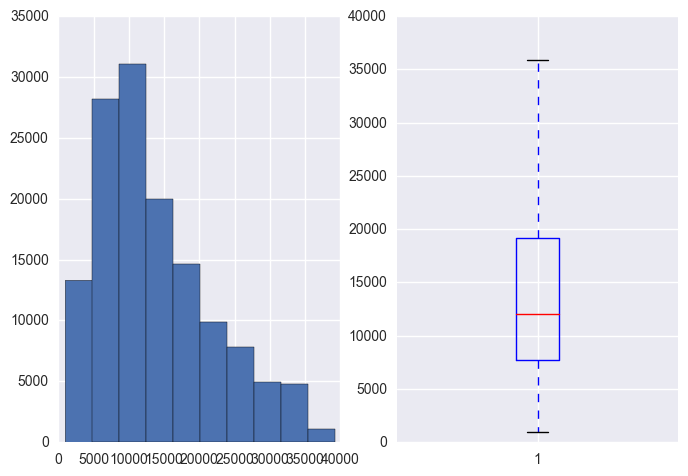

In [54]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(df.a)
ax2.boxplot(df.a)

*Normalizing it by applying log into "Current Loan Amount"

(array([   880.,   1740.,   2525.,   6426.,  14170.,  17367.,  31075.,
         26720.,  22926.,  11867.]),
 array([  6.88243747,   7.25210188,   7.62176629,   7.9914307 ,
          8.36109511,   8.73075952,   9.10042393,   9.47008834,
          9.83975275,  10.20941716,  10.57908157]),
 <a list of 10 Patch objects>)

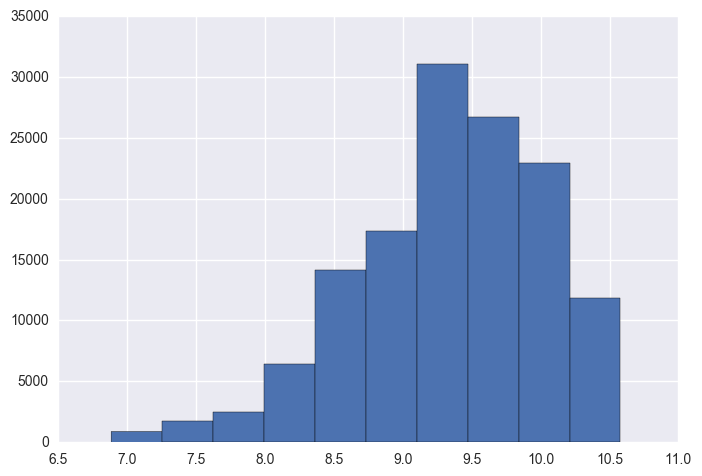

In [55]:
plt.hist(np.log(df.a))

*Now we have the histogram that is skewed to the left

*Now we want to plot x as "Credit Utilization" & y as "Loan Status"

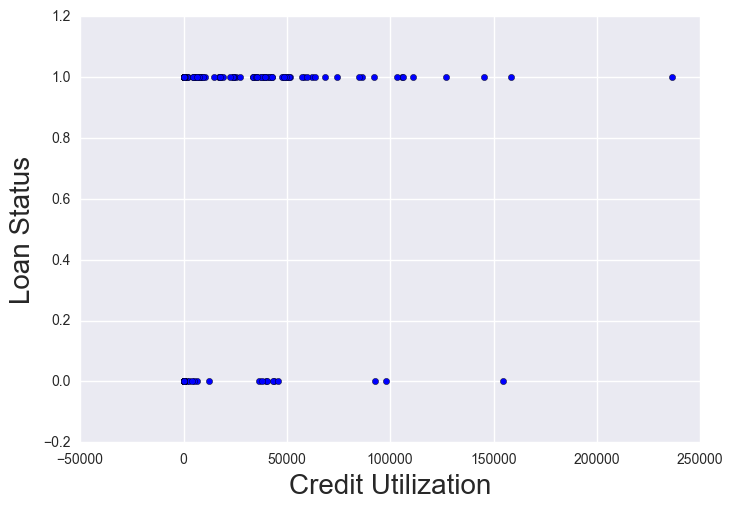

In [56]:
x = df['p']
y = df['y']

# make the plot
fig = plt.figure()
ax = fig.add_subplot(111)  
ax.scatter(x, y)
ax.set_ylabel('Loan Status', fontsize=20)  
ax.set_xlabel('Credit Utilization', fontsize=20)

*Note that Loan Status = 1 is Fully Paid and it's more dense on the left; We can conclude that customers who have Loan Status of Fully Paid tend to have lower credit utilization rate

*Now we want to create the dummy variables for categorical values using dmatrices

In [57]:
from patsy import dmatrices
y, X = dmatrices('y ~ a + b + c + d + C(e) + f + C(g) + h + i + j + k + l + m + n + o + p + q', df, return_type = 'dataframe')

In [58]:
X.head()

,Intercept,C(e)[T.Own Home],C(e)[T.Rent],C(g)[T.Buy House],C(g)[T.Buy a Car],C(g)[T.Debt Consolidation],C(g)[T.Educational Expenses],C(g)[T.Home Improvements],C(g)[T.Medical Bills],C(g)[T.Other],...,h,i,j,k,l,m,n,o,p,q
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,584.03,12.3,10.0,0.0,6760.0,16056.0,0.0,0.0,0.421000,0.207994
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1106.04,26.3,17.0,0.0,6262.0,19149.0,0.0,0.0,0.326997,0.313993
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1321.85,28.8,5.0,0.0,20967.0,28335.0,0.0,0.0,0.739942,0.175998
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,751.92,26.2,9.0,0.0,22529.0,43915.0,0.0,0.0,0.513002,0.236993
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,355.18,11.5,12.0,0.0,17391.0,37081.0,0.0,0.0,0.468988,0.085199


In [59]:
y.head()

,y
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [60]:
X.shape, y.shape

((135696, 26), (135696, 1))

# Modeling

In [61]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

//anaconda/envs/python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


1. Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

//anaconda/envs/python2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.73177921344174501

In [63]:
y_pred_loanstatus = logreg.predict(X_test)

In [64]:
from sklearn import metrics
print metrics.accuracy_score(y_pred_loanstatus, y_test)

0.731779213442


In [65]:
report = metrics.classification_report(y_pred_loanstatus, y_test)
print report

             precision    recall  f1-score   support

        0.0       0.01      0.51      0.01       140
        1.0       1.00      0.73      0.84     40569

avg / total       0.99      0.73      0.84     40709



*Logistic Regression: accuracy score = 0.73; f1 score = 0.84

*Drop Intercept column to fit different models

In [66]:
X = X.drop(['Intercept'], axis = 1)

In [67]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

 2.. Random Forest Classifier

*Let's take a look at shapes of X, y, X_train, y_train, X_test, y_test

In [68]:
X.shape, y.shape

((135696, 25), (135696, 1))

In [69]:
X_train.shape, y_train.shape

((94987, 25), (94987, 1))

In [70]:
X_test.shape, y_test.shape

((40709, 25), (40709, 1))

*1st method: GridSearchCV

*Converting y_train to array

In [71]:
y_train = np.ravel(y_train)

In [72]:
y_train.shape 

(94987,)

In [73]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

param_grid = {"n_estimators": [100, 200, 300],
              "max_features": [3, 5],
              "max_depth": [10, 20],
              "min_samples_split": [2, 4]}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, n_jobs=-1, cv=2)
grid_search.fit(X_train, y_train)
print grid_search.best_params_
print grid_search.best_score_
print grid_search.best_estimator_

//anaconda/envs/python2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'max_features': 5, 'min_samples_split': 2, 'n_estimators': 200, 'max_depth': 10}
0.735269036816
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


*Now, we can put "best" parameters into random forest classifier;   
*Fitting in training, scoring in testing

In [74]:
rfc = RandomForestClassifier(max_features= 5, min_samples_split= 2, n_estimators= 100, max_depth= 10)

rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.73988552899850157

*Prediting in X_test

In [75]:
y_pred_loanstatus= rfc.predict(X_test)

In [76]:
from sklearn import metrics
print metrics.accuracy_score(y_pred_loanstatus, y_test)

0.739885528999


In [77]:
report = metrics.classification_report(y_pred_loanstatus, y_test)
print report

             precision    recall  f1-score   support

        0.0       0.13      0.57      0.21      2480
        1.0       0.96      0.75      0.84     38229

avg / total       0.91      0.74      0.81     40709



*Logistic Regression (1st method): accuracy score = 0.74; f1 score = 0.81

*2nd method: GridSearchCV using make_classification; use n_samples = total rows from df (135696), #n_features as number of total columns (26)

In [96]:
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=135696,
                           #n_features=26,  
                           #n_informative=3,
                           #n_redundant=0,
                           #n_repeated=0,
                           #n_classes=2,
                           random_state=0,
                           shuffle=False)


rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=500, oob_score = True) 

param_grid = {'n_estimators': [100, 200, 300],
              'max_features': ['auto', 'sqrt', 'log2']}

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 2)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_
print grid.best_estimator_

{'max_features': 'log2', 'n_estimators': 300}
0.733237179825
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)


*Now, we can put "best" parameters into random forest classifier; Fitting in training, scoring in testing

In [98]:
rfc = RandomForestClassifier(max_features= 'log2', n_estimators= 300)

In [100]:
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.73887838070205603

*Prediting in X_test

In [101]:
y_pred_loanstatus = rfc.predict(X_test)

In [102]:
from sklearn import metrics
print metrics.accuracy_score(y_pred_loanstatus, y_test)

0.738878380702


In [103]:
report = metrics.classification_report(y_pred_loanstatus, y_test)
print report

             precision    recall  f1-score   support

        0.0       0.18      0.54      0.27      3699
        1.0       0.94      0.76      0.84     37010

avg / total       0.87      0.74      0.79     40709



*Logistic Regression (2nd method): accuracy score = 0.74; f1 score = 0.79

3.. Gradient boosting - 1st method

In [90]:
y_train.shape

(94987,)

*We only need to run GridSearchCV once, so we don't have to re-run here, but we can add "learning rate" parameter for Gradient boosting

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

param_grid = {"learning_rate": [0.1, 0.5]}

grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, n_jobs=-1, cv=2)
grid_search.fit(X_train, y_train)
print grid_search.best_params_
print grid_search.best_score_
print grid_search.best_estimator_

{'learning_rate': 0.1}
0.736279701433
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)


*Now, we can put "best" parameters(from previous modeling part) & adding learning rate parameter into gradient boosting classifier; Fitting in training, scoring in testing

In [92]:
gbc = GradientBoostingClassifier(max_features= 5, min_samples_split= 2, n_estimators= 100, max_depth= 10, learning_rate= 0.1)

gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.73826426588715022

*Prediting in X_test

In [93]:
y_pred_loanstatus= gbc.predict(X_test)

In [94]:
from sklearn import metrics
print metrics.accuracy_score(y_pred_loanstatus, y_test)

0.738264265887


In [95]:
report = metrics.classification_report(y_pred_loanstatus, y_test)
print report

             precision    recall  f1-score   support

        0.0       0.21      0.53      0.30      4374
        1.0       0.93      0.76      0.84     36335

avg / total       0.85      0.74      0.78     40709



*Gradient Boosting(1st method): accuracy score = 0.74; f1 score = 0.78

Gradient boosting - 2nd method:

In [104]:
gbc = GradientBoostingClassifier(max_features= 'log2', n_estimators= 300, learning_rate= 0.1)

In [105]:
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.74212090692475863

In [106]:
y_pred_loanstatus= gbc.predict(X_test)

In [107]:
from sklearn import metrics
print metrics.accuracy_score(y_pred_loanstatus, y_test)

0.742120906925


In [108]:
report = metrics.classification_report(y_pred_loanstatus, y_test)
print report

             precision    recall  f1-score   support

        0.0       0.19      0.56      0.28      3727
        1.0       0.94      0.76      0.84     36982

avg / total       0.88      0.74      0.79     40709



*Gradient Boosting(2nd method): accuracy score = 0.74; f1 score = 0.79